In [1]:
import io
import glob
import math

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

from sklearn import metrics



In [2]:
data = pd.read_csv("planilhas/dfRegressaoDias.csv", sep=';', parse_dates=['Data'], index_col="Data")

train, test = np.split(data, [int(.70*len(data))])

train, test

c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(            CasosDia
 Data                
 2020-03-15         3
 2020-03-16         3
 2020-03-17         3
 2020-03-18         1
 2020-03-19         0
 ...              ...
 2022-11-05         1
 2022-11-06         0
 2022-11-07         6
 2022-11-08         1
 2022-11-09         7
 
 [970 rows x 1 columns],
             CasosDia
 Data                
 2022-11-10         9
 2022-11-11        15
 2022-11-12         8
 2022-11-13         5
 2022-11-14         9
 ...              ...
 2023-12-27         3
 2023-12-28         6
 2023-12-29         6
 2023-12-30         1
 2023-12-31         2
 
 [417 rows x 1 columns])

In [3]:

optimal_n = None
best_mse = None

db = data[['CasosDia']].values.astype('float32')

reusltadoMedio = np.zeros(int(len(db) / 8 - 2))
print(int(len(db) / 8 + 1))

for n in range(3, int(len(db) / 8 + 1)): #goes from 3 to 19

  mediaN = np.zeros(len(db) - n)
  for i in range(0, len(db) - n):
    print(0, len(db) - n)
    mediaN[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    
  reusltadoMedio[n - 3] = np.mean(mediaN)

optimal_n = np.argmin(reusltadoMedio) + 3
best_mse = np.min(reusltadoMedio)

print("MSE = %s" % reusltadoMedio)
print("Melhor MSE = %s" % best_mse)
print("Otimo n = %s" % optimal_n)

forecast = np.zeros(len(db))
for i in range(0,len(train)):
  forecast[i] == None
for i in range(len(train), len(db)):
  forecast[i] = db[i][0]

for i in range(0, len(forecast)):
  forecast[i] = np.mean(db[:, 0][i:i+optimal_n])

future_forecast = forecast[len(train):]
print(future_forecast, len(future_forecast), len(test))

# plt.plot(db, color='red', label = 'Casos reais')
# plt.plot(future_forecast, color='blue', label = 'Casos previstos')
# plt.legend()
# plt.show()


mae_media_movel = metrics.mean_absolute_error(test['CasosDia'], future_forecast)
mse_media_movel = metrics.mean_squared_error(test['CasosDia'], future_forecast)
print("MEAN ABSOLUTE ERROR =", mae_media_movel)
print("MEAN SQUARED ERROR =", mse_media_movel)
import math
rmse_media_movel = math.sqrt(mse_media_movel)
print("ROOT MEAN SQUARED ERROR =", rmse_media_movel)

174
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 1384
0 

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error

# SAVE DF WITH FORECAST AND REAL
df_real_forecast = pd.DataFrame(test['CasosDia'])
# df_real_forecast = df_real_forecast.assign(Qtde_Casos=y_test)
df_real_forecast = df_real_forecast.assign(Forecast=future_forecast)
print(df_real_forecast)

#df_real_forecast.to_excel('/content/drive/My Drive/Artigo Reciis/Resultados/Predicoes/MM_monthly_forecast.xlsx')

mse = mean_squared_error(df_real_forecast['Forecast'], df_real_forecast['CasosDia'])
mae = mean_absolute_error(df_real_forecast['Forecast'], df_real_forecast['CasosDia'])
rmse = math.sqrt(mse)


dfMediaMovel = pd.DataFrame({
    'PARA': [optimal_n],
    'MAE': [mae],
    'MSE': [mse],
    'RMSE': [rmse]
})
dfMediaMovel.to_csv('resultadosModelos/dfMediaMovel.csv', sep = ';', index = False, encoding='UTF-8')

            CasosDia  Forecast
Data                          
2022-11-10         9    13.875
2022-11-11        15    19.000
2022-11-12         8    20.250
2022-11-13         5    21.750
2022-11-14         9    30.375
...              ...       ...
2023-12-27         3     3.600
2023-12-28         6     3.750
2023-12-29         6     3.000
2023-12-30         1     1.500
2023-12-31         2     2.000

[417 rows x 2 columns]


417
2022-11-10 00:00:00


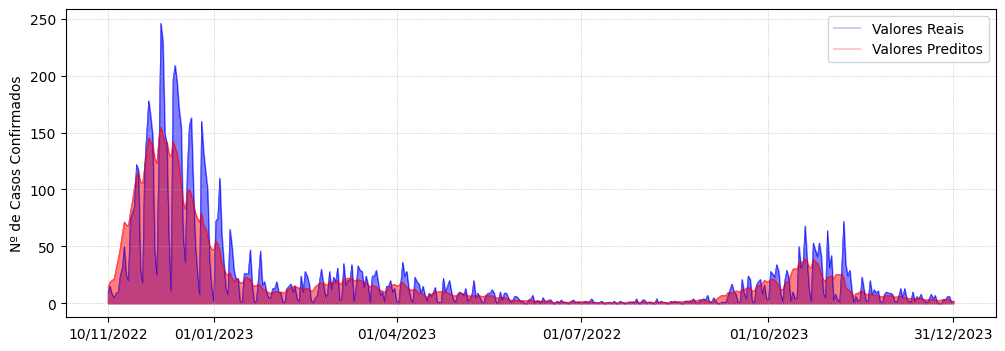

In [5]:


casos_reais = df_real_forecast['CasosDia']
forecast = df_real_forecast['Forecast']

print(len(casos_reais))

print(casos_reais.index[0])

stringGraf =  'graficos/4-'+ 'MediaMovel' + '.pdf'
plt.figure(figsize=(12, 4))
plt.plot(casos_reais, label='Valores Reais', color='blue', linewidth=0.3)
plt.plot(forecast, label='Valores Preditos', color='red', linewidth=0.3)
plt.fill_between(casos_reais.index, casos_reais, color='blue', alpha=0.5)
plt.fill_between(forecast.index, forecast.values.flatten(), color='red', alpha=0.5)  # Pinta a área entre as linhas
plt.ylabel('Nº de Casos Confirmados')
plt.legend()
ticks_pos = [casos_reais.index[0], '2023-01','2023-04', '2023-07','2023-10', casos_reais.index[-1]]
ticks_labels = [
    '10/11/2022',
    '01/01/2023',
    '01/04/2023',
    '01/07/2022',
    '01/10/2023',
    '31/12/2023',
]
plt.grid(linestyle=':', linewidth=.5, alpha=1)
plt.xticks(ticks_pos, labels=ticks_labels)
plt.savefig(stringGraf, dpi=300, bbox_inches="tight")
plt.show()
#plt.savefig('/content/drive/My Drive/Artigo Reciis/Graficos/MM_monthly_1.png', dpi=300, bbox_inches='tight')